# SC1015 DSAI Mini Project

## Problem Formulation

### Asteroids analysis and classifier

#### On 15 February 2013, an approximately 18 m in diameter and 9100 tonne asteroid entered Earth's atmosphere undetected and exploded over the southern Ural region in Russia. The asteroid had a total kinetic energy of about 1.4–1.8 PJ before atmospheric impact, which was estimated to be 26-33 times as much energy as that released from the atomic bomb detonated at Hiroshima. Even though most of the object's energy was absorbed by the atmosphere, some 7200 buildings in six cities across the region were damaged by the explosion's shock wave, and 1491 people were injured seriously enough to seek medical treatment. As a result, it is crucial to detect and identify hazardous astroids early so as to provide ample time for the authorities to take action to mitigate the asteroid impact. 

## Part 1: Data Cleaning and Preparation

#### The first step in our project involved cleaning and preparing the dataset. This is needed to extract meaningful insights and address the question we posed.

#### <b>Question</b>: What is the likelihood of an asteroid posing a threat to Earth?

#### <b>Data Set</b>: The dataset used for this project is retrieved from [here](https://www.kaggle.com/datasets/lovishbansal123/nasa-asteroids-classification/data)

## Import required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Import dataset

In [5]:
asteroid_data = pd.read_csv("nasa.csv")
asteroid_data

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [6]:
asteroid_data.shape

(4687, 40)

In [7]:
asteroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [8]:
asteroid_data.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [9]:
asteroid_data.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


#### We realised that there are many repeated datas in our dataset, but in different units. For example, estimated diameters in metres and kilometers are referring to the same data. In order to minimise the number of datas for our dataset, we chose metres (M) as our unit of measurement for estimated diameter, km per hr for relative velocity, and kilometers for miss distance. The columns with other units of measurement will be dropped. 

In [10]:
asteroid_data = asteroid_data.drop(['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Relative Velocity km per sec', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)', 'Miles per hour', 'Neo Reference ID', 'Name'], axis = 1)

In [11]:
asteroid_data

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbiting Body,Orbit ID,Orbit Determination Date,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.600,127.219879,284.472297,1995-01-01,788947200000,22017.003799,6.275369e+07,Earth,17,2017-04-06 08:36:37,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,21.300,146.067964,326.617897,1995-01-01,788947200000,65210.346095,5.729815e+07,Earth,21,2017-04-06 08:32:49,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,20.300,231.502122,517.654482,1995-01-08,789552000000,27326.560182,7.622912e+06,Earth,22,2017-04-06 09:20:19,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,27.400,8.801465,19.680675,1995-01-15,790156800000,40225.948191,4.268362e+07,Earth,7,2017-04-06 09:15:49,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,21.600,127.219879,284.472297,1995-01-15,790156800000,35426.991794,6.101082e+07,Earth,25,2017-04-06 08:57:58,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,44.111820,98.637028,2016-09-08,1473318000000,79755.354273,6.187511e+06,Earth,4,2017-04-06 08:24:07,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,28.200,6.089126,13.615700,2016-09-08,1473318000000,11610.539577,9.677324e+05,Earth,2,2017-04-06 08:23:58,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,22.700,76.657557,171.411509,2016-09-08,1473318000000,25889.910626,9.126775e+06,Earth,17,2017-04-06 08:23:43,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,21.800,116.025908,259.441818,2016-09-08,1473318000000,40867.522309,3.900908e+07,Earth,6,2017-04-06 08:23:42,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


#### In order to minimise potential errors made during the estimation of an asteroid's diameter, we would like to calculate the Mean Estimated Diameter in Metres for all asteroids in the dataset. 

In [12]:
asteroid_data['Mean Est Dia in M'] = np.mean(asteroid_data[['Est Dia in M(min)', 'Est Dia in M(max)']], axis=1)
asteroid_data

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbiting Body,Orbit ID,Orbit Determination Date,...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,Mean Est Dia in M
0,21.600,127.219879,284.472297,1995-01-01,788947200000,22017.003799,6.275369e+07,Earth,17,2017-04-06 08:36:37,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True,205.846088
1,21.300,146.067964,326.617897,1995-01-01,788947200000,65210.346095,5.729815e+07,Earth,21,2017-04-06 08:32:49,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False,236.342931
2,20.300,231.502122,517.654482,1995-01-08,789552000000,27326.560182,7.622912e+06,Earth,22,2017-04-06 09:20:19,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True,374.578302
3,27.400,8.801465,19.680675,1995-01-15,790156800000,40225.948191,4.268362e+07,Earth,7,2017-04-06 09:15:49,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False,14.241070
4,21.600,127.219879,284.472297,1995-01-15,790156800000,35426.991794,6.101082e+07,Earth,25,2017-04-06 08:57:58,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True,205.846088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,44.111820,98.637028,2016-09-08,1473318000000,79755.354273,6.187511e+06,Earth,4,2017-04-06 08:24:07,...,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False,71.374424
4683,28.200,6.089126,13.615700,2016-09-08,1473318000000,11610.539577,9.677324e+05,Earth,2,2017-04-06 08:23:58,...,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False,9.852413
4684,22.700,76.657557,171.411509,2016-09-08,1473318000000,25889.910626,9.126775e+06,Earth,17,2017-04-06 08:23:43,...,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False,124.034533
4685,21.800,116.025908,259.441818,2016-09-08,1473318000000,40867.522309,3.900908e+07,Earth,6,2017-04-06 08:23:42,...,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False,187.733863


#### After dropping repeated data, we would like to take our data cleaning process one step further by removing the unwanted variables. After careful consideration, we believe that the most important factors for analysing an asteroid's hazardous level would be "Estimated Diameter", "Relative Velocity" and "Miss Distance". The reasons are stated below :

#### Estimated Diameter : Larger asteroids are likely to have greater mass, resulting in greater impact and damages.
#### Relative velocity : The greater the relative velocity of an asteroid to Earth, the greater kinetic energy it possesses, causing greater impact upon impact with Earth's surface.
#### Miss Distance : The smaller the miss distance from Earth, the higher the likelihood of an asteroid entering the Earth's atmosphere.

#### The variable 'Hazardous' is a boolean variable, where '1' represents True and '0' represents False.

In [13]:
asteroid_data_subset = asteroid_data[['Est Dia in M(min)', 'Est Dia in M(max)', 'Mean Est Dia in M','Relative Velocity km per hr', 'Miss Dist.(kilometers)', 'Hazardous']]

In [14]:
asteroid_data_subset

,Est Dia in M(min),Est Dia in M(max),Mean Est Dia in M,Relative Velocity km per hr,Miss Dist.(kilometers),Hazardous
0,127.219879,284.472297,205.846088,22017.003799,6.275369e+07,True
1,146.067964,326.617897,236.342931,65210.346095,5.729815e+07,False
2,231.502122,517.654482,374.578302,27326.560182,7.622912e+06,True
3,8.801465,19.680675,14.241070,40225.948191,4.268362e+07,False
4,127.219879,284.472297,205.846088,35426.991794,6.101082e+07,True
...,...,...,...,...,...,...
4682,44.111820,98.637028,71.374424,79755.354273,6.187511e+06,False
4683,6.089126,13.615700,9.852413,11610.539577,9.677324e+05,False
4684,76.657557,171.411509,124.034533,25889.910626,9.126775e+06,False
4685,116.025908,259.441818,187.733863,40867.522309,3.900908e+07,False


In [15]:
asteroid_data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Est Dia in M(min)            4687 non-null   float64
 1   Est Dia in M(max)            4687 non-null   float64
 2   Mean Est Dia in M            4687 non-null   float64
 3   Relative Velocity km per hr  4687 non-null   float64
 4   Miss Dist.(kilometers)       4687 non-null   float64
 5   Hazardous                    4687 non-null   bool   
dtypes: bool(1), float64(5)
memory usage: 187.8 KB


In [16]:
asteroid_data_subset.describe()

,Est Dia in M(min),Est Dia in M(max),Mean Est Dia in M,Relative Velocity km per hr,Miss Dist.(kilometers)
count,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03
mean,204.604203,457.508906,331.056555,50294.919829,3.841347e+07
std,369.573402,826.391249,597.982325,26255.601377,2.181110e+07
min,1.010543,2.259644,1.635094,1207.814804,2.660989e+04
25%,33.462237,74.823838,54.143038,30358.313370,1.995928e+07
50%,110.803882,247.765013,179.284447,46504.401181,3.964771e+07
75%,253.837029,567.596853,410.716941,65079.535405,5.746863e+07
max,15579.552413,34836.938254,25208.245333,160681.487851,7.478160e+07


In [17]:
asteroid_data_subset.dtypes

Est Dia in M(min)              float64
Est Dia in M(max)              float64
Mean Est Dia in M              float64
Relative Velocity km per hr    float64
Miss Dist.(kilometers)         float64
Hazardous                         bool
dtype: object

## Part 2: Exploratory Data Analysis

### Uni-variate Statistics

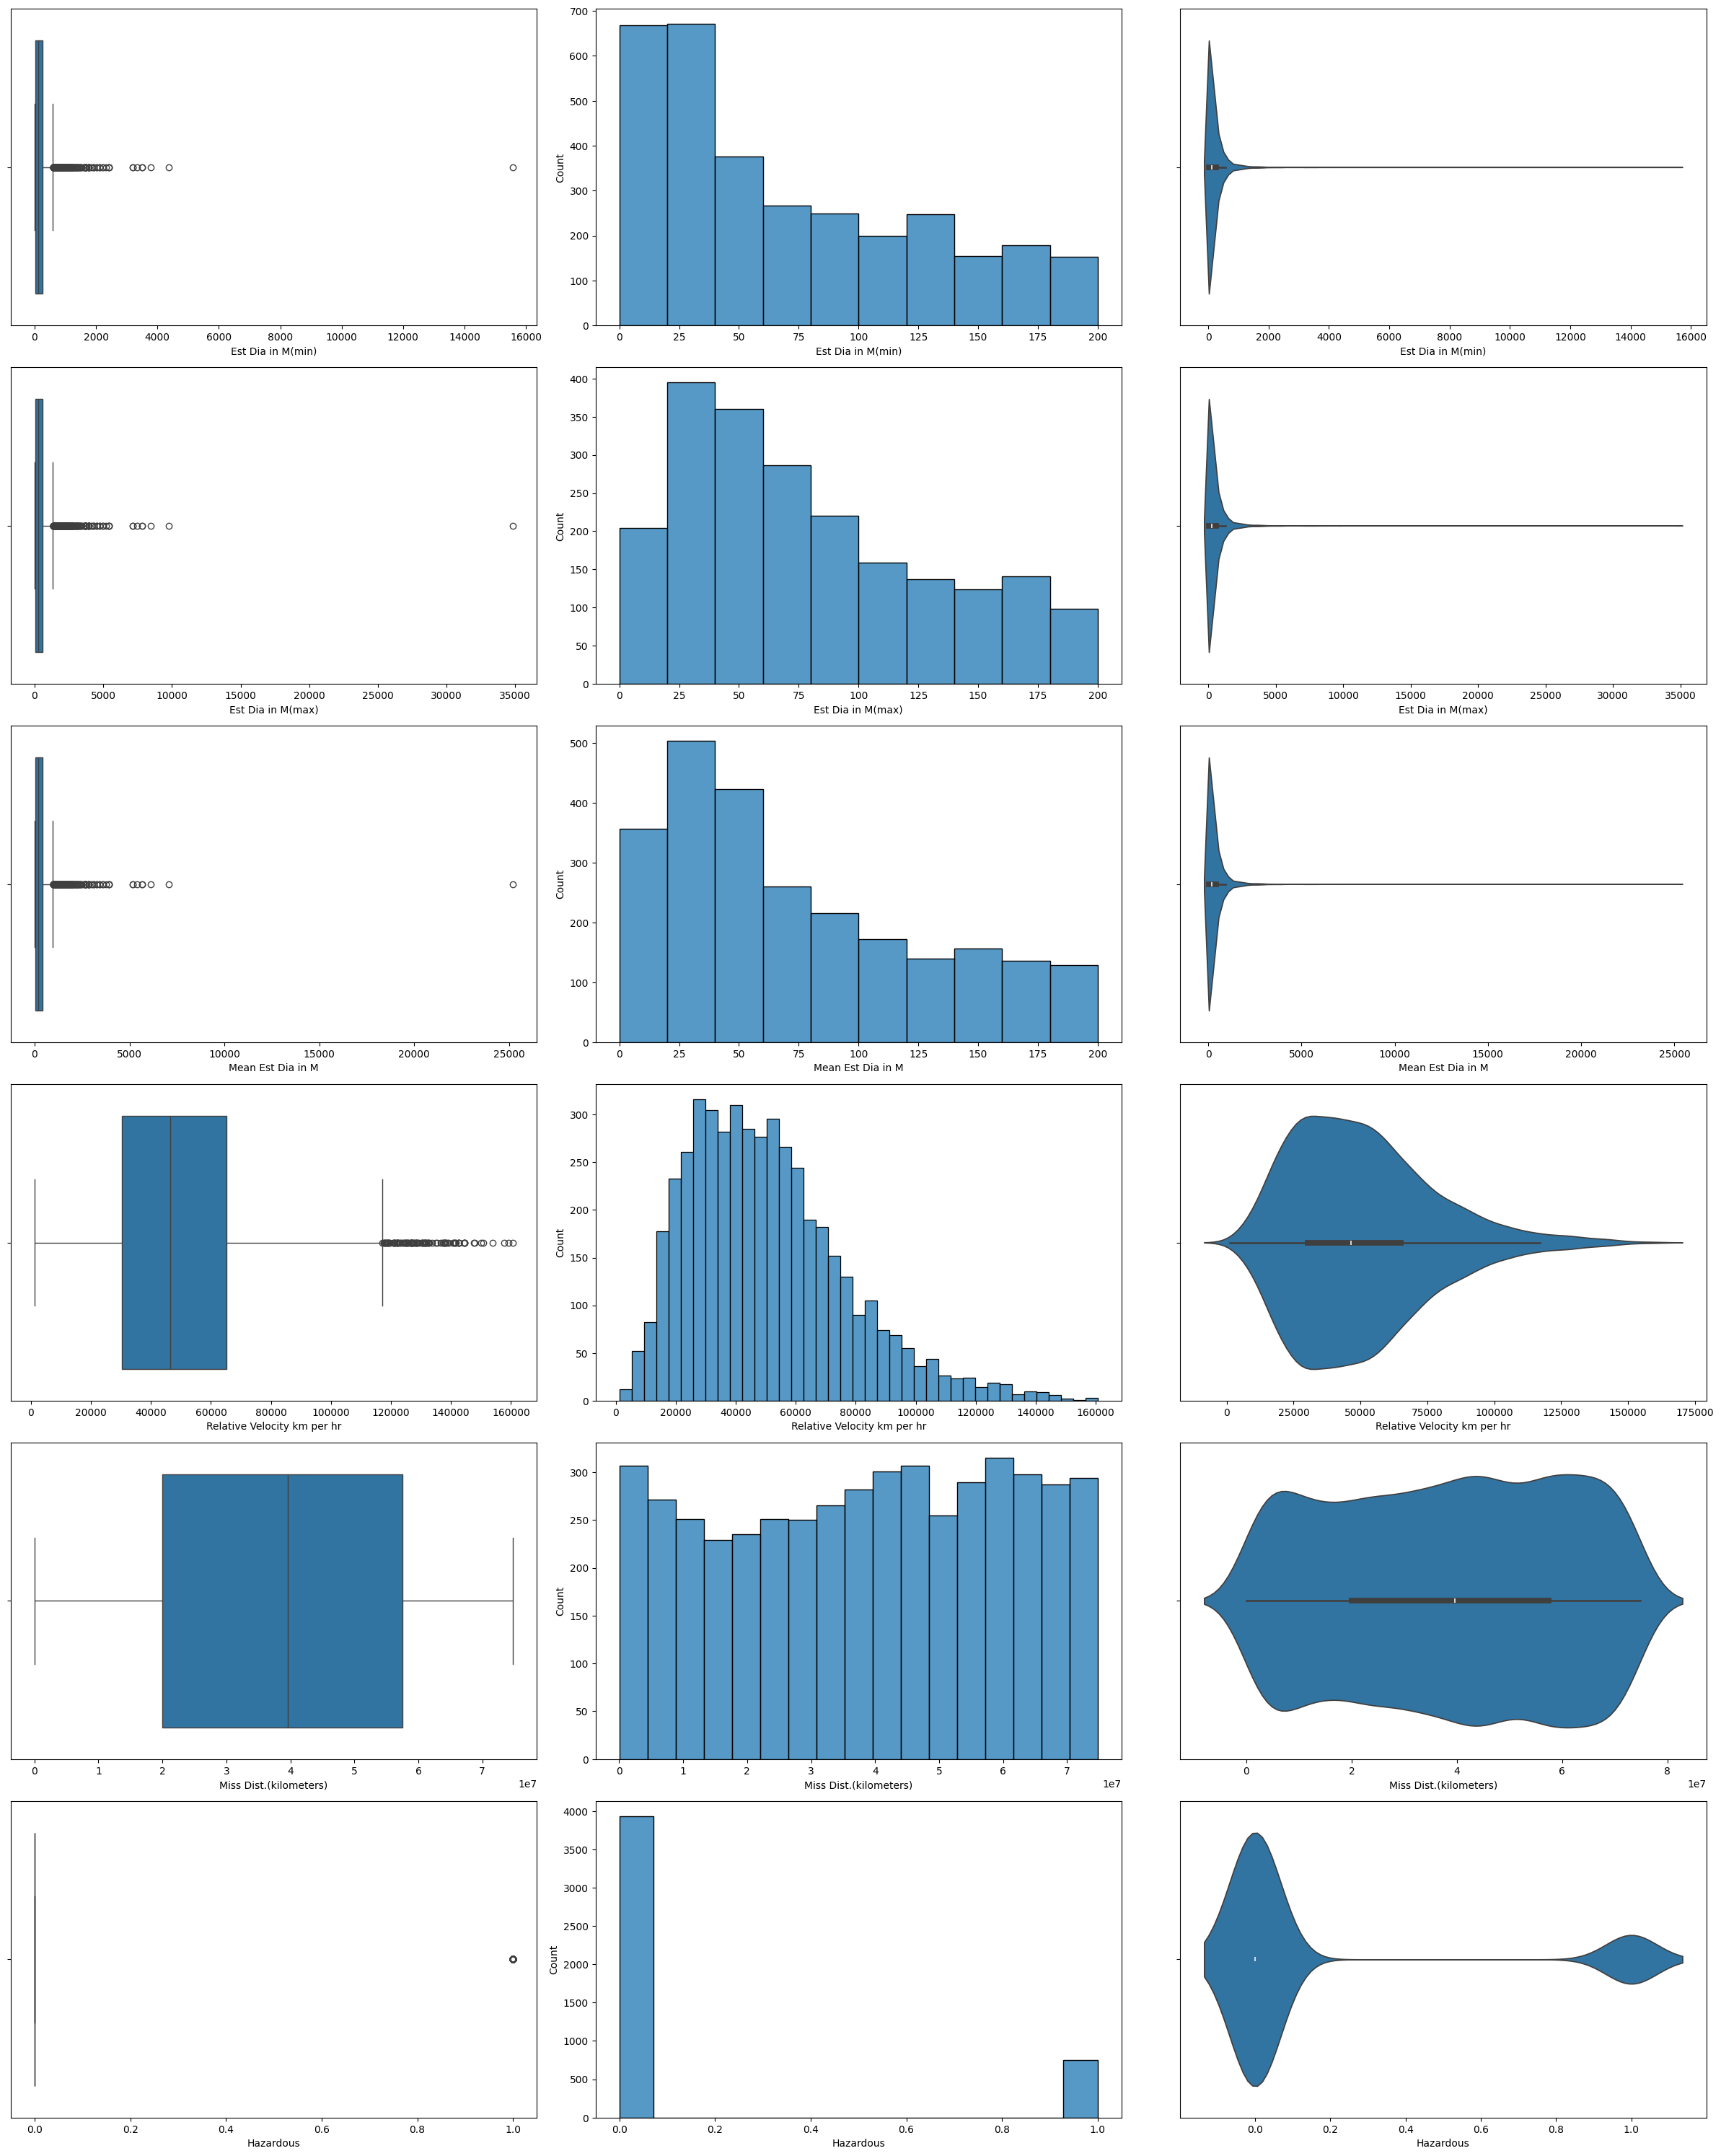

In [18]:
# Define custom bin edges for each variable
bin_edges = {
    'Est Dia in M(min)': [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
    'Est Dia in M(max)': [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
    'Mean Est Dia in M': [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
}

# Create subplots
f, axes = plt.subplots(6, 3, figsize=(24, 30))

counter = 0
for x in asteroid_data_subset:
    # Plot boxplot
    sb.boxplot(data=asteroid_data_subset[x], orient="h", ax=axes[counter, 0])
    
    # Plot histogram with custom bin edges
    if x in bin_edges:
        sb.histplot(data=asteroid_data_subset[x], bins=bin_edges[x], ax=axes[counter, 1])
    else:
        sb.histplot(data=asteroid_data_subset[x], ax=axes[counter, 1])
    
    # Plot violinplot
    sb.violinplot(data=asteroid_data_subset[x], orient="h", ax=axes[counter, 2])
    
    counter += 1

plt.tight_layout()
plt.show()


As seen from these graphs, some of the numerical values, namely mean estimated diameter and relative velocity. This means that the diameter is relatively below average and the meteor is considered smaller in size. The relative velocity is also slower, which means most of the meteors do not pose a threat. As for the hazardous count, most of the meteors lie in the 0.0 range, with a small number lying in the 1.0 range. 

### Bi-variate Statistics

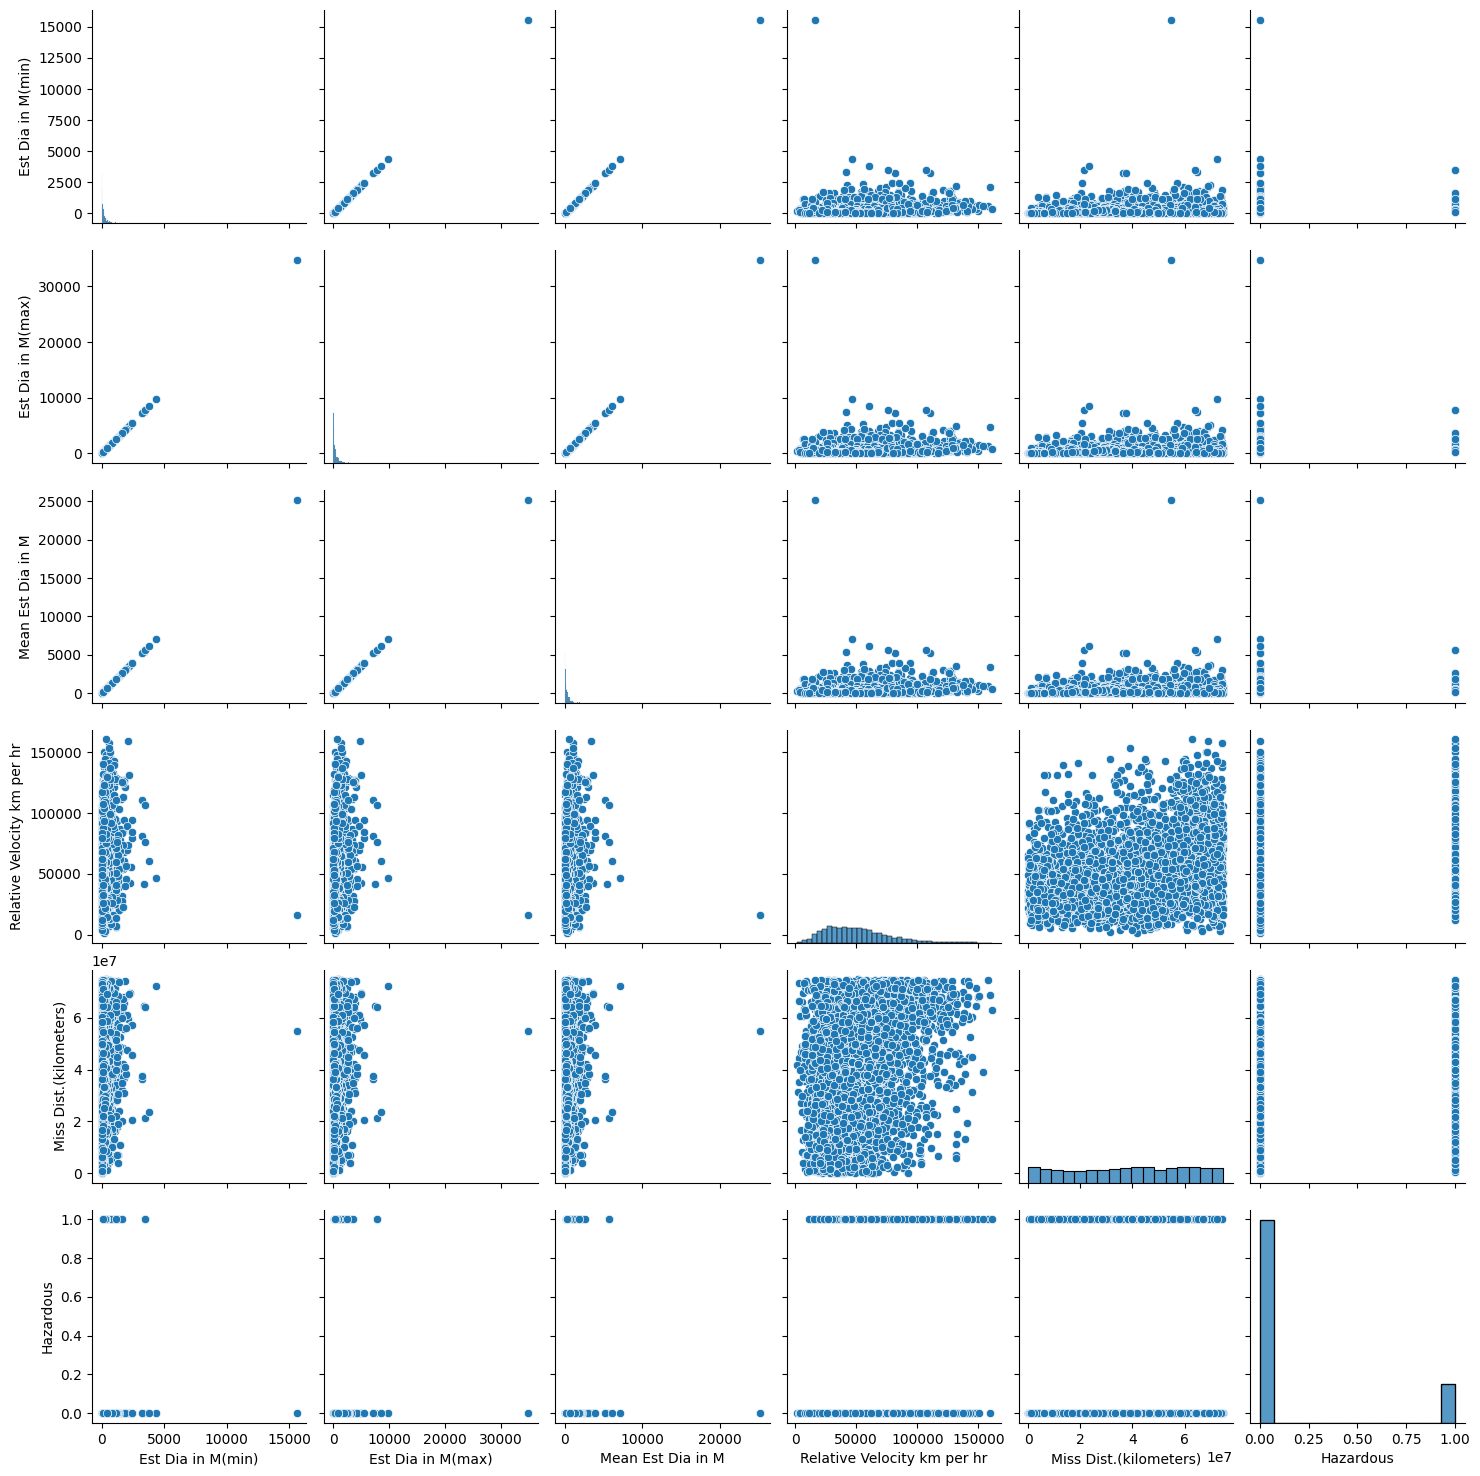

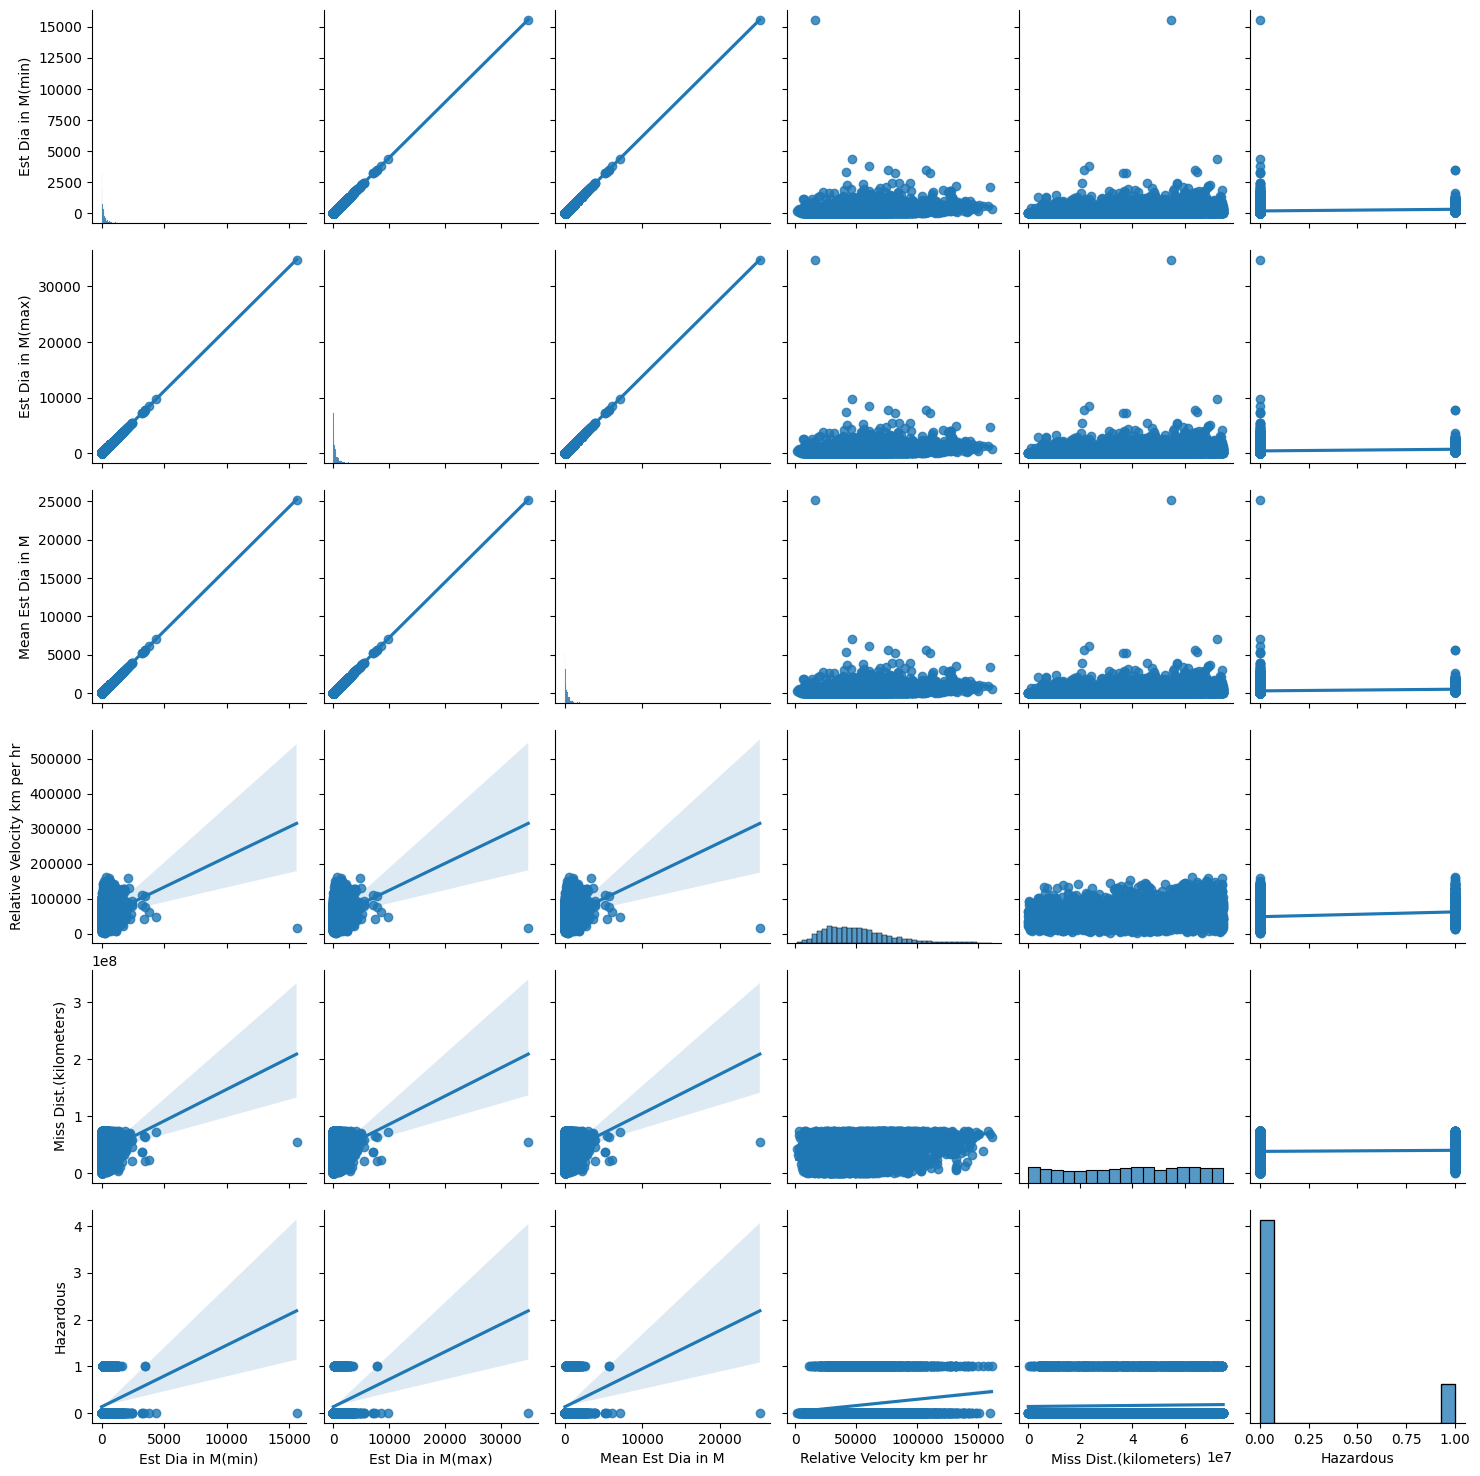

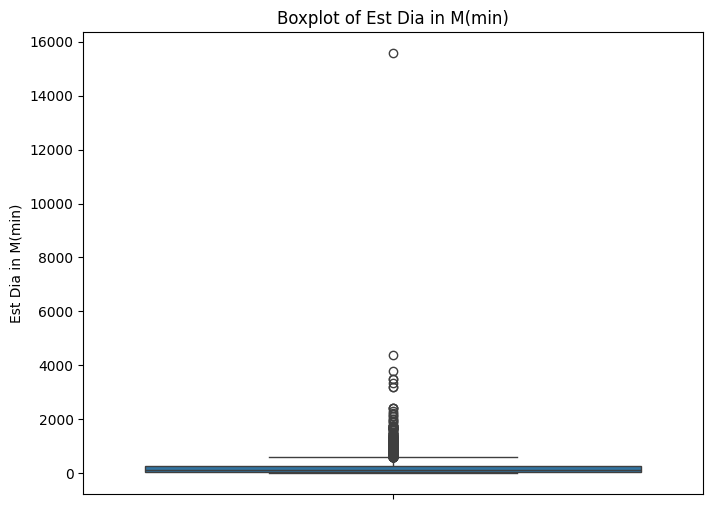

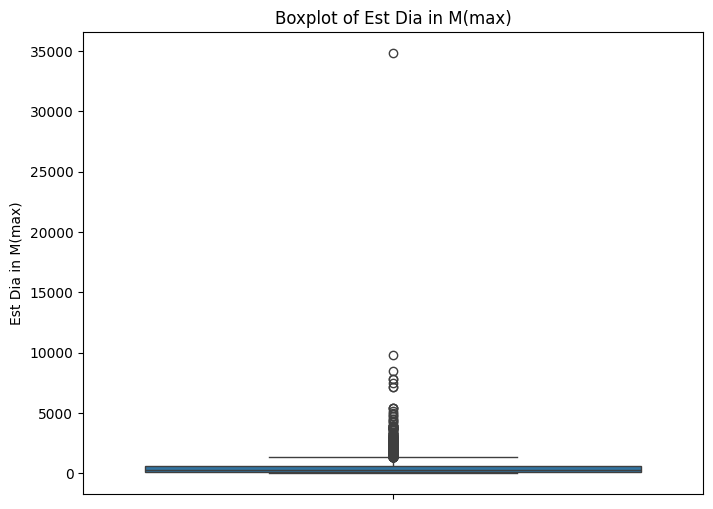

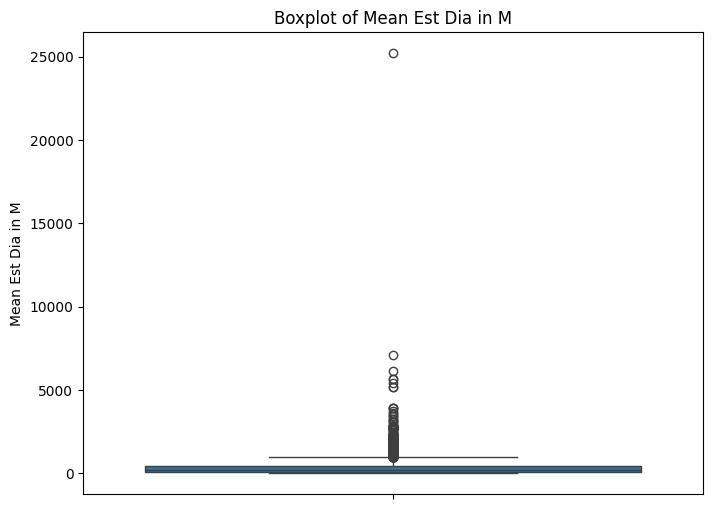

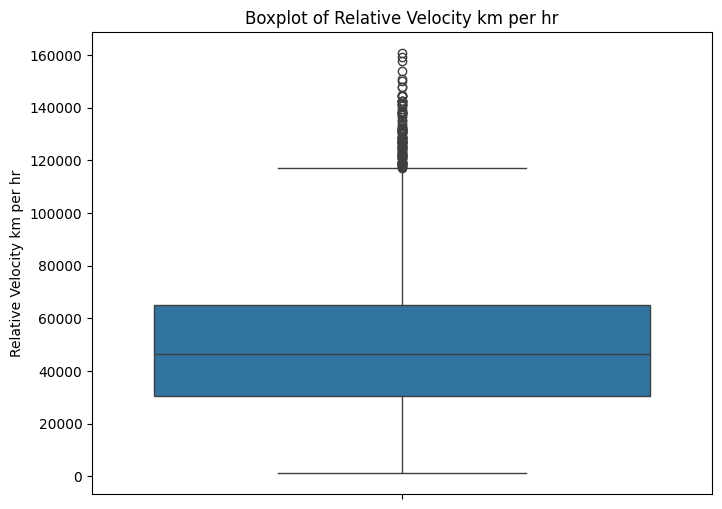

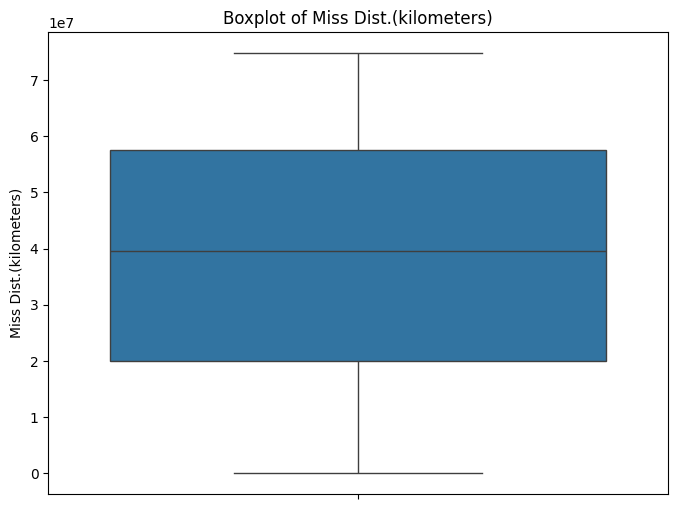

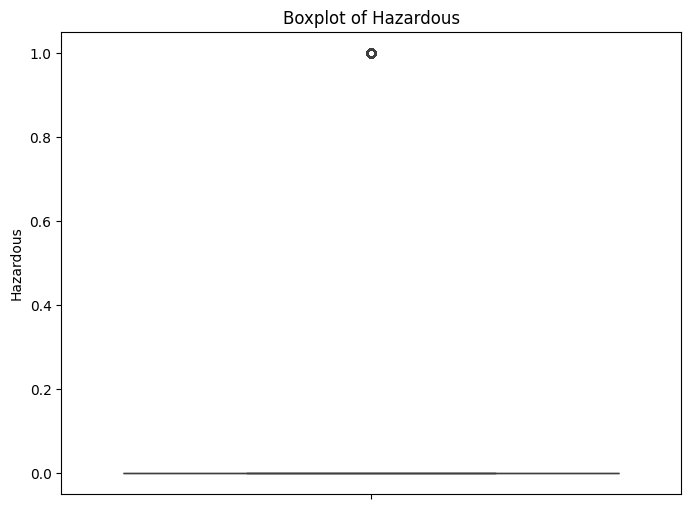

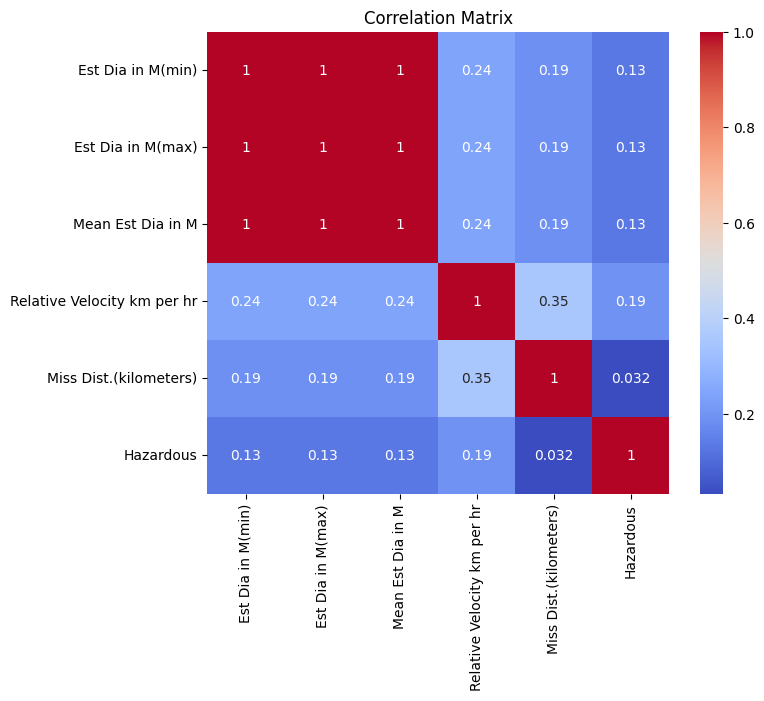

In [19]:
# Define the subset of data containing numerical variables
numerical_subset = asteroid_data_subset[['Est Dia in M(min)', 'Est Dia in M(max)', 'Mean Est Dia in M', 'Relative Velocity km per hr', 'Miss Dist.(kilometers)', 'Hazardous']]

# Scatter plots for numerical variables
sb.pairplot(numerical_subset)
plt.show()

# Scatter plots for numerical variables with regression line
sb.pairplot(numerical_subset, kind='reg')
plt.show()

# Box plots for numerical variables
for column in numerical_subset.columns:
    plt.figure(figsize=(8, 6))
    sb.boxplot(data=asteroid_data_subset[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Heatmap for correlation matrix of numerical variables
correlation_matrix = numerical_subset.corr()
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


Seeing from the heatmap, the correlation between the mean estimated diameter, relative velocity, miss distance and hazardous is relatively low (below 0.2). This shows that all the variables have a low linear correlation against hazardous, so they have a poor linear relationship.

However, this may mean that they may have a non-linear relationship. So, we shall also explore non-linear models. 

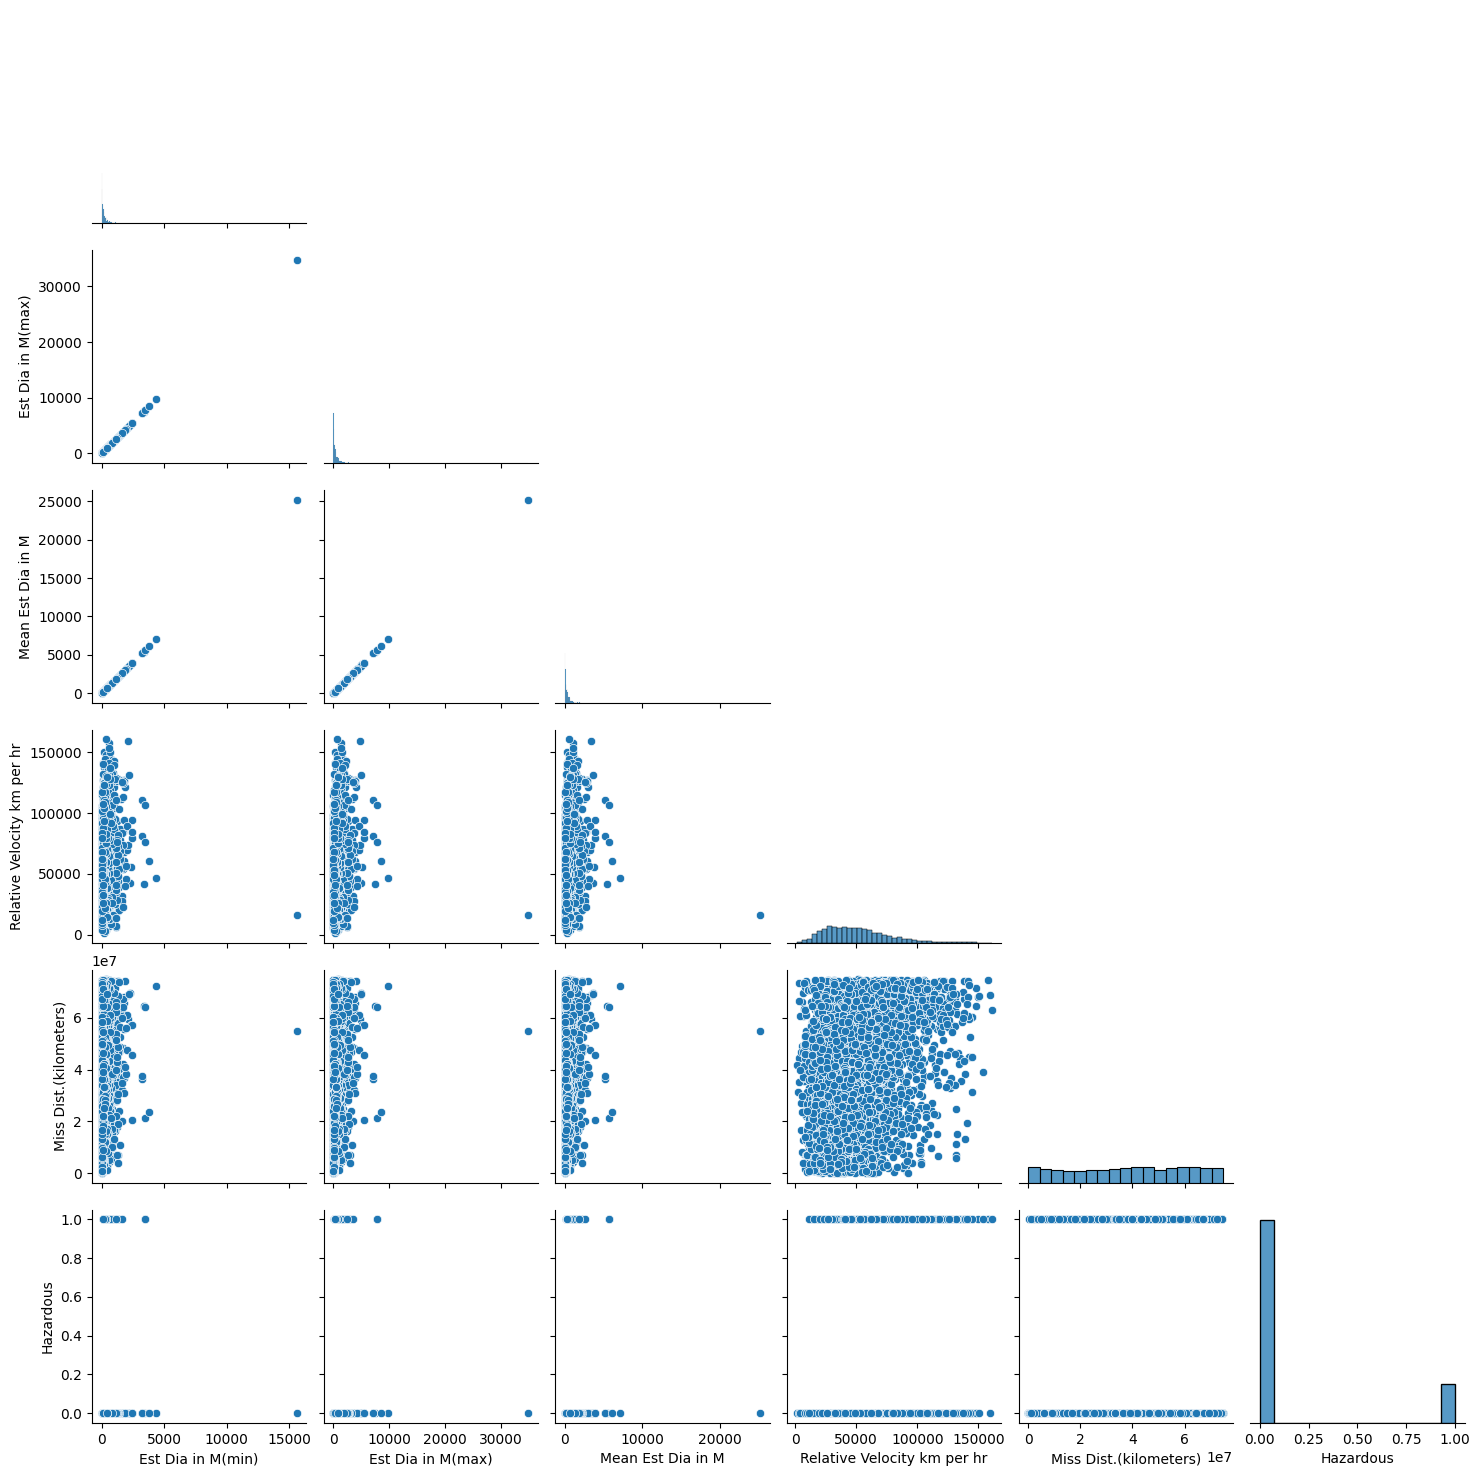

In [20]:
sb.pairplot(data = asteroid_data_subset, corner = True)


Specifically for hazardous against other numerical variables. 

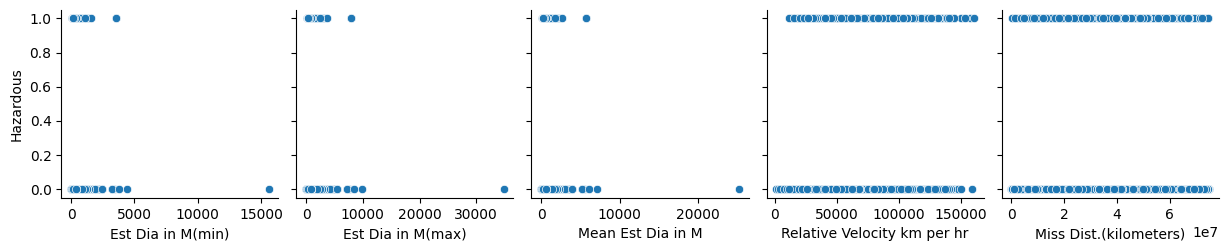

In [23]:
sb.pairplot(data=asteroid_data_subset,
                  y_vars=['Hazardous'],
                  x_vars=['Est Dia in M(min)', 'Est Dia in M(max)','Mean Est Dia in M', 'Relative Velocity km per hr', 'Miss Dist.(kilometers)'])

# Data cleaning
Before using logistic regression, there is a need to clean the dataset as the asteroid dataset has a larger number of non-hazardous asteroids as compared to hazardous ones. We will try using random undersampling, random oversampling, and smotetomek sampling, to determine the best dataset to use for analysis.

## 1. Random undersampling
Decrease instances of hazardous asteroids, by keeping the same amount of hazardous asteroids as that of non-hazardous. 

In [105]:
dataset = asteroid_data_subset[['Est Dia in M(min)', 'Est Dia in M(max)', 'Mean Est Dia in M', 'Relative Velocity km per hr', 'Miss Dist.(kilometers)', 'Hazardous']]
hazardous_asteroids = dataset[dataset['Hazardous'] == 1]
non_hazardous_asteroids = dataset[dataset['Hazardous'] == 0]
num_non_hazardous = len(non_hazardous_asteroids)
undersampled_hazardous_asteroids = hazardous_asteroids.sample(n=num_non_hazardous, random_state=42, replace=True)

# Combine the undersampled hazardous asteroids with non-hazardous asteroids.
undersampled_data = pd.concat([undersampled_hazardous_asteroids, non_hazardous_asteroids])
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the balanced dataset into X and Y
X = undersampled_data.drop('Hazardous', axis=1)  
y = undersampled_data['Hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

undersampled_data

,Est Dia in M(min),Est Dia in M(max),Mean Est Dia in M,Relative Velocity km per hr,Miss Dist.(kilometers),Hazardous
0,350.392641,783.501764,566.947203,50468.923111,54885520.0,True
1,402.304580,899.580388,650.942484,61631.204382,64770804.0,True
2,555.334912,1241.766613,898.550762,34148.268699,48893496.0,True
3,116.025908,259.441818,187.733863,52305.207102,61035972.0,True
4,66.765941,149.293183,108.029562,46968.245275,23101282.0,False
...,...,...,...,...,...,...
7859,58.150704,130.028927,94.089815,58721.435510,32632056.0,False
7860,8.801465,19.680675,14.241070,81485.299005,57767764.0,False
7861,350.392641,783.501764,566.947203,69459.931599,44768532.0,True
7862,13.321557,29.787906,21.554731,23971.274291,38977612.0,False


In [106]:
undersampled_data.to_csv('undersampled_data.csv', index=False)

In [107]:
# import the cleaned dataset
undersampled_data = pd.read_csv('undersampled_data.csv') 


## Logistic Regression using undersampled data

#### Used to predict the probability of Hazardous (1 or 0) based on Est Dia in M(min), Est Dia in M(max), Mean Est Dia in M, Relative Velocity km per hr and Miss Dist.(kilometers).

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

1. Separate features (x) and target variable (y).

In [108]:
X = undersampled_data[['Est Dia in M(min)','Est Dia in M(max)','Mean Est Dia in M','Relative Velocity km per hr', 'Miss Dist.(kilometers)']].values
y = undersampled_data['Hazardous'].values

2. Split the dataset into training and testing sets to train the logistic regression model.

In [96]:
from sklearn.model_selection import train_test_split


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. Train the model using the training data. 

In [97]:
from sklearn.linear_model import LogisticRegression


In [98]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)


LogisticRegression()

4. Evaluate the performance of the trained model on the testing data.

In [78]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [109]:
y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

auc_roc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])
print("AUC-ROC Score:", auc_roc)

Accuracy: 0.6166560712015258
              precision    recall  f1-score   support

       False       0.63      0.52      0.57       763
        True       0.61      0.71      0.66       810

    accuracy                           0.62      1573
   macro avg       0.62      0.61      0.61      1573
weighted avg       0.62      0.62      0.61      1573

AUC-ROC Score: 0.6749931233111661


The model is relatively accurate as the score is above 0.5, as accuracy is calculated by (number of correct predictions)/(total number of predictions).

Since the AUC-ROC score is above 0.5, it indicates that the model can decently discriminate between positive and negative classes, in this case hazardous and non-hazardous asteroids. 

## 2. Random oversampling

Increases number of hazardous by randomly duplicating examples from hazardous. 

In [110]:
from imblearn.over_sampling import RandomOverSampler

In [111]:
dataset = asteroid_data_subset[['Est Dia in M(min)', 'Est Dia in M(max)', 'Mean Est Dia in M', 'Relative Velocity km per hr', 'Miss Dist.(kilometers)', 'Hazardous']]
hazardous_asteroids = dataset[dataset['Hazardous'] == 1]
non_hazardous_asteroids = dataset[dataset['Hazardous'] == 0]

In [113]:
X = dataset.drop('Hazardous', axis=1)  
y = dataset['Hazardous']

In [114]:
oversampled_data = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampled_data.fit_resample(X, y)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


## Logistic Regression using oversampled data

In [116]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [117]:
log_reg = LogisticRegression(max_iter=1000)  
log_reg.fit(X_train, y_train)  

LogisticRegression(max_iter=1000)

In [119]:
y_prob = log_reg.predict_proba(X_test)[:, 1]


In [120]:
auc_roc_score = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc_roc_score)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

AUC-ROC Score: 0.6805709184762571
Accuracy: 0.6160203432930705
Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.48      0.56       801
        True       0.58      0.75      0.66       772

    accuracy                           0.62      1573
   macro avg       0.63      0.62      0.61      1573
weighted avg       0.63      0.62      0.61      1573



## 3. SMOTETomek sampling

In [121]:
import pandas as pd
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


In [122]:
dataset = asteroid_data_subset[['Est Dia in M(min)', 'Est Dia in M(max)', 'Mean Est Dia in M', 'Relative Velocity km per hr', 'Miss Dist.(kilometers)', 'Hazardous']]
hazardous_asteroids = dataset[dataset['Hazardous'] == 1]
non_hazardous_asteroids = dataset[dataset['Hazardous'] == 0]

In [125]:
X = dataset.drop('Hazardous', axis=1) 
y = dataset['Hazardous']

In [126]:
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


## Logistic Regression using SMOTETomek data

In [128]:
log_reg = LogisticRegression(max_iter=1000)  
log_reg.fit(X_train, y_train)  


LogisticRegression(max_iter=1000)

In [129]:
y_prob = log_reg.predict_proba(X_test)[:, 1]


In [130]:
auc_roc_score = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc_roc_score)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

AUC-ROC Score: 0.7010125112584252
Accuracy: 0.6223520818115412
Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.48      0.56       686
        True       0.59      0.76      0.67       683

    accuracy                           0.62      1369
   macro avg       0.63      0.62      0.61      1369
weighted avg       0.63      0.62      0.61      1369



Now, compare the accuracy across the 3 datasets. 

#### Undersampling data
- Accuracy: 0.61666
- Auc-roc: 0.674993

#### Oversampling data
- Accuracy: 0.61602
- Auc-roc: 0.68057

#### SMOTETomek data
- Accuracy: 0.62235
- Auc-roc: 0.70101

Hence, SMOTETomek data is able to train the most accurate and reliable agent.

## Now, implement neural networks for classification using TensorFlow. 
This neural network is implemented using the SMOTETomek resampled data cleaned previous.

In [143]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [144]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [146]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [147]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

In [148]:
input_size = X_train.shape[1]
learning_rate = 0.001
num_epochs = 10
batch_size = 64

In [149]:
# Initialise the neural network
model = NeuralNetwork(input_size)


In [153]:
criterion = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [154]:
# Train the model
for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 0.4344
Epoch [2/10], Loss: 0.3524
Epoch [3/10], Loss: 0.3320
Epoch [4/10], Loss: 0.3218
Epoch [5/10], Loss: 0.3155
Epoch [6/10], Loss: 0.3111
Epoch [7/10], Loss: 0.3072
Epoch [8/10], Loss: 0.3044
Epoch [9/10], Loss: 0.3031
Epoch [10/10], Loss: 0.3014


This shows the training progress of the neural network model over 10 epochs. As the loss decreases each time, it implies that the model is making progress in reducing the error and that its performance is improving. 

In [156]:
# Evaluate the model
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)  # Reshape to (batch_size, 1)

with torch.no_grad():
    outputs = model(X_test_tensor)
    predictions = (outputs >= 0.5).float()
    accuracy = (predictions == y_test_tensor).float().mean()
    print(f'Accuracy: {accuracy.item():.4f}')

Accuracy: 0.7969


In this case, an accuracy of 0.7969 means that the model correctly predicted the class (hazardous or non-hazardous) for approximately 79.69% of the samples in the testing dataset.

This is a significant improvement from Accuracy = 0.62235 obtained from the logistic regression using the SMOTETomek dataset. 